## Figure 2 Code to Produce Figures

This figure will focus on the presentation of the Methods.

In [1]:
# importing packages
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import pandas as pd
import csv
import math
import random
import pickle
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import squareform, pdist
import scipy.io
from scipy import stats
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import statsmodels.api as sm
from sklearn import manifold
from factor_analyzer import FactorAnalyzer
plt.rcParams.update({'font.size': 13})
plt.rcParams["figure.figsize"] = (10,10)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Session 13 Preperation

In [2]:
###################### Load in Calcium Fluoresence Data ######################
session13_fluorescence = np.load("../Data/Session13/sessionM409828_13_CALCIUM-FLUORESCENCE.npy")
session_info = "V1DD_Session13"

### Create Pandas data frame of the data
ns = [f"n{i}" for i in range(session13_fluorescence[0,:].shape[0])]
session13_fluorescence_df = pd.DataFrame(session13_fluorescence, columns = ns)
session13_fluorescence_df

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2698,n2699,n2700,n2701,n2702,n2703,n2704,n2705,n2706,n2707
0,386.614746,356.042969,364.569641,411.091553,307.887634,258.511169,321.968903,181.205994,265.892914,280.296112,...,274.629486,350.200104,283.980774,345.541870,244.838470,274.587616,292.187408,362.794220,309.516724,318.196716
1,394.779144,321.291138,300.326233,364.549255,365.808014,276.043915,443.065826,276.137421,284.962494,311.085419,...,237.430527,300.656067,371.085419,369.188751,297.386108,266.207123,252.236877,384.805908,253.801224,309.436493
2,430.134644,356.892334,316.089752,369.321747,357.231720,268.536591,380.504395,237.075073,292.391113,303.730865,...,234.579224,233.114975,375.837341,309.508606,319.197876,264.221771,299.052185,421.659119,268.491364,308.236237
3,492.495636,435.140076,328.820099,450.870300,322.758728,283.486267,456.826660,240.693878,298.278900,312.732330,...,312.513519,288.417877,375.175171,298.330444,295.929596,281.991943,291.278473,378.071320,384.879822,342.556366
4,419.968262,367.274200,324.190277,457.118439,391.038940,298.655029,425.800476,229.693817,371.756531,293.526672,...,258.952301,349.974335,346.097595,366.578918,297.467255,328.501526,309.428894,408.260315,347.325104,331.188110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21611,312.012756,361.765015,292.936798,479.136536,364.582458,348.525269,432.958282,265.899567,364.285889,276.832275,...,265.440521,327.389404,314.704071,284.906982,287.028564,280.412109,305.130524,442.109039,266.693573,285.021912
21612,412.542938,353.919128,323.288300,348.898071,383.361847,344.100220,437.041687,193.464905,314.954651,297.092010,...,258.959564,406.966003,341.093964,357.600220,352.963226,278.937195,294.812195,447.871368,294.682220,292.638519
21613,372.910217,388.861816,337.440063,453.535980,350.960876,268.740021,372.935608,239.881393,377.214508,268.052277,...,270.972809,270.036163,298.712524,378.840210,286.396790,301.706818,279.817627,359.911774,317.252136,257.778015
21614,328.085480,415.220123,292.897522,428.899628,355.838837,375.188202,457.023590,239.636383,302.490509,297.914673,...,266.925446,329.060760,306.616821,377.095612,253.035202,261.195953,280.266388,365.129639,325.545532,349.931305


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


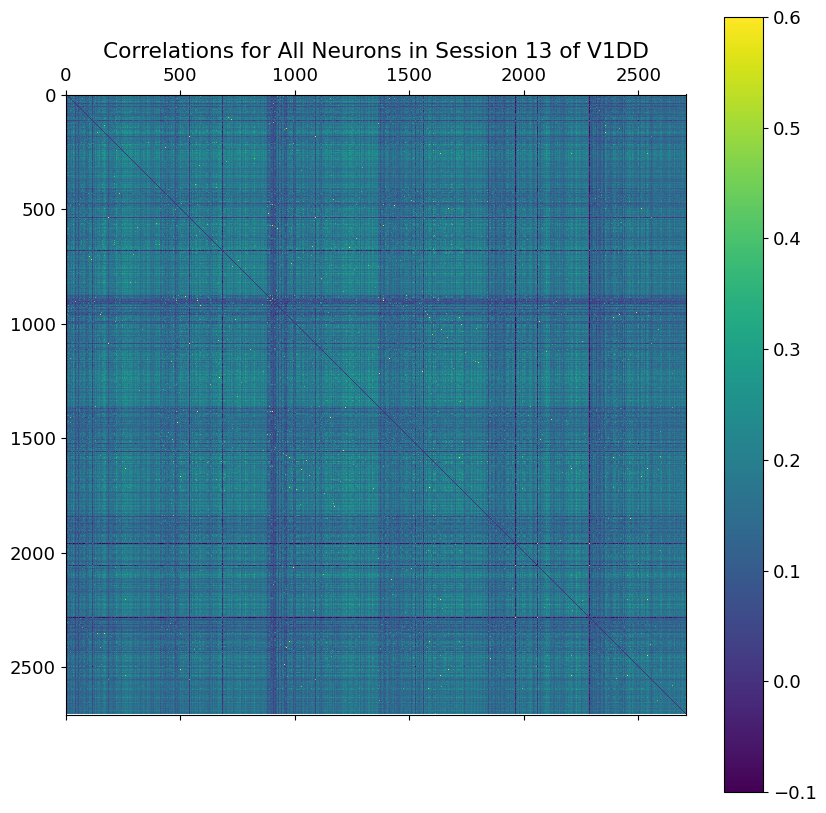

In [3]:
### Produce the Correlation Matrix
corr_matrix_session13_V1DD = corr_v1DD_scan14_F_df= pd.DataFrame(np.corrcoef(session13_fluorescence_df.values, rowvar=False), columns=session13_fluorescence_df.columns)
np.fill_diagonal(corr_matrix_session13_V1DD.values, 0) # Set All Self Correlations to 0
plt.matshow(corr_matrix_session13_V1DD)
plt.title('Correlations for All Neurons in Session 13 of V1DD')
plt.clim(-0.1, 0.6)
plt.colorbar()
plt.savefig('Correlation_Matrix.png')
plt.show()

### Factor Analysis

We start with a factor analysis to extract the optimal number of components with which to produce the manifold. 

In [ ]:
analyzer = FactorAnalyzer(rotation = None, impute = "drop", n_factors= corr_matrix_session13_V1DD.shape[1])
analyzer.fit(corr_matrix_session13_V1DD)
evals,_ = analyzer.get_eigenvalues()
np.save("EVals_Correlation_Matrix", evals)

In [5]:
evals = np.load("EVals_Correlation_Matrix.npy")

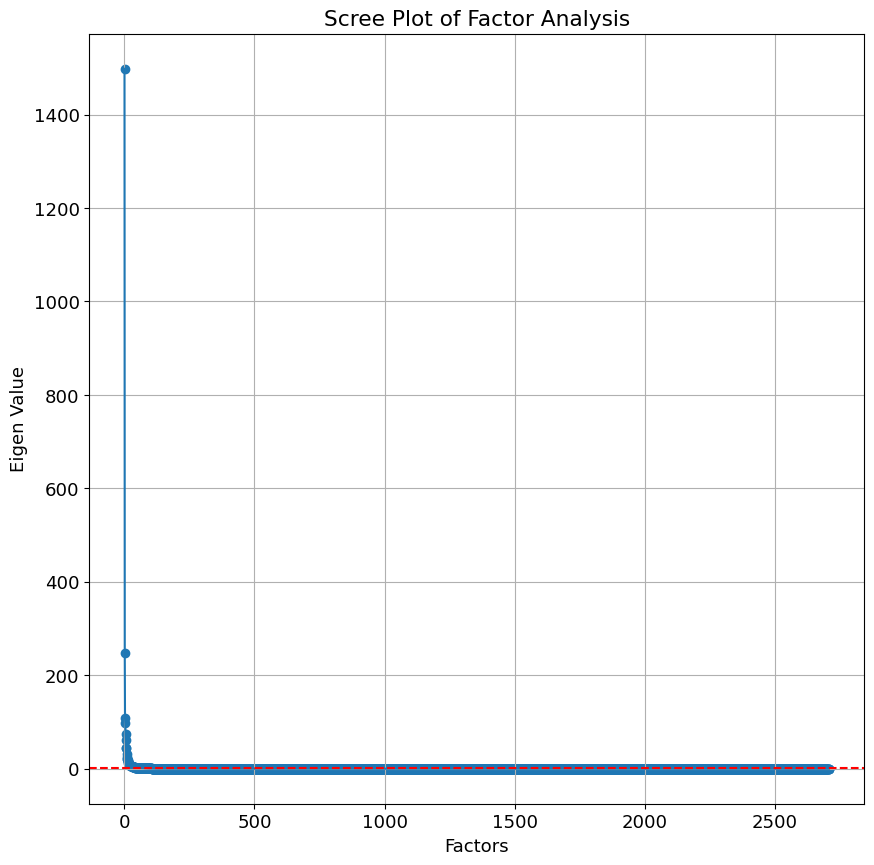

In [6]:
### Produce a Scree Plot of the Factor Analysis
evals = np.load("EVals_Correlation_Matrix.npy")
plt.scatter(range(1, corr_matrix_session13_V1DD.shape[1]+1), evals)
plt.plot(range(1, corr_matrix_session13_V1DD.shape[1]+1), evals)
plt.axhline(y = 1.0, color = 'r', linestyle = 'dashed')
plt.title('Scree Plot of Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.savefig("Scree_Plot.png", dpi = 300)
plt.show()

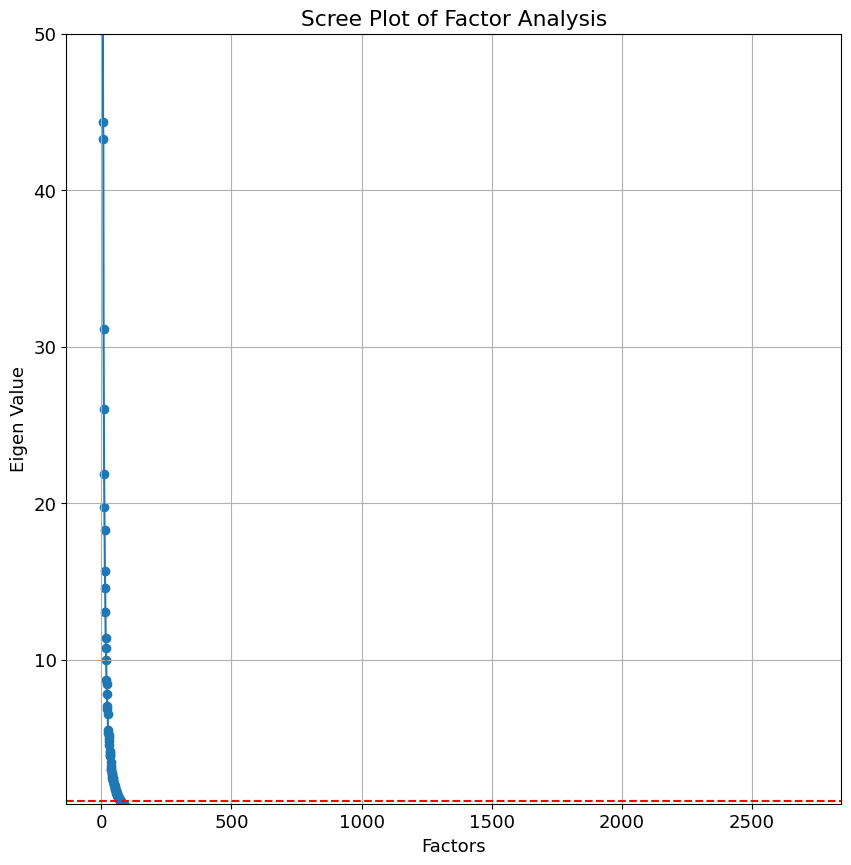

In [25]:
### Produce a Scree Plot of the Factor Analysis
plt.scatter(range(1, corr_matrix_session13_V1DD.shape[1]+1), evals)
plt.plot(range(1, corr_matrix_session13_V1DD.shape[1]+1), evals)
plt.axhline(y = 1.0, color = 'r', linestyle = 'dashed')
plt.title('Scree Plot of Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.ylim((0.8, 50))
plt.grid()
plt.savefig("Zoomed_Scree_Plot.png", dpi = 300)
plt.show()

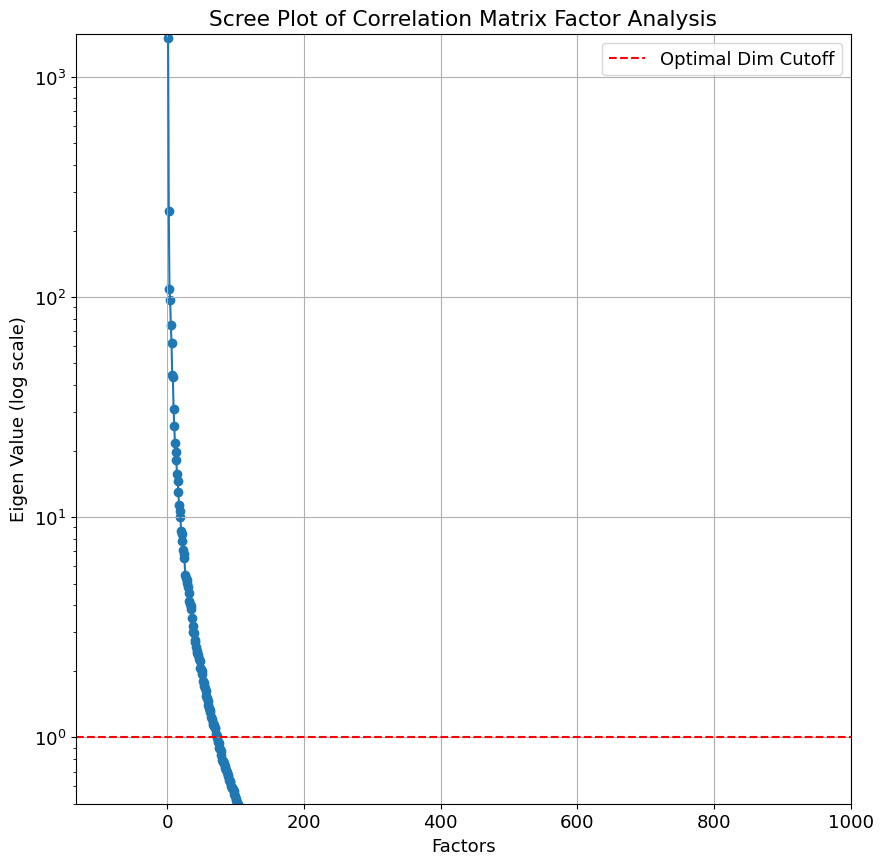

In [26]:
### Produce a Scree Plot of the Factor Analysis
plt.scatter(range(1, corr_matrix_session13_V1DD.shape[1]+1), evals)
plt.plot(range(1, corr_matrix_session13_V1DD.shape[1]+1), evals)
plt.axhline(y = 1.0, color = 'r', linestyle = 'dashed', label = 'Optimal Dim Cutoff')
plt.title('Scree Plot of Correlation Matrix Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('Eigen Value (log scale)')
plt.ylim((0.5, None))
plt.xlim((None, 1000))
plt.yscale('log')
plt.grid()
plt.legend()
plt.savefig("Zoomed_Scree_Plot_log_scale.png", dpi = 300)
plt.show()

In [ ]:
idx = np.argwhere(np.diff(np.sign(evals - 2.0))).flatten()
idx

array([49])

The Factor Analysis reveals that there exist 50 components with eigenvalue greater than 2.0, implying these are the optimal dimensions. To confirm, we will output the explained cumulative variance as well.

In [ ]:
optimal_dim = 50

In [ ]:
fa = FactorAnalyzer(rotation = "varimax", impute = "drop", n_factors = optimal_dim)
fa.fit(corr_matrix_session13_V1DD)
# Get variance of each factors
fa.get_factor_variance()[2]

/home/julian/anaconda3/envs/cell_assembly/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:536: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn('Failed to converge: {}'.format(res.message))


array([0.34566136, 0.5535639 , 0.61225186, 0.6693385 , 0.70638208,
       0.73876791, 0.7665374 , 0.77956924, 0.78939456, 0.79830454,
       0.80686289, 0.81457137, 0.82097087, 0.82710644, 0.83295427,
       0.83782849, 0.84251453, 0.84699917, 0.8513535 , 0.85551103,
       0.85947048, 0.8633963 , 0.86719432, 0.87092233, 0.8745545 ,
       0.87788604, 0.88104053, 0.88406464, 0.88689461, 0.88915499,
       0.89111753, 0.8930659 , 0.89494691, 0.89680864, 0.89861559,
       0.90041728, 0.90219591, 0.90392715, 0.90560374, 0.90721939,
       0.90881934, 0.91033546, 0.91181108, 0.91314893, 0.91446973,
       0.91574931, 0.91699496, 0.91821914, 0.91942919, 0.92051821])

### Isomap Embedding

In [ ]:
### Function to Produce a Manifoldfrom a Disimilarity Matrix
def produce_manifold(curr_diss_matrix, session_info, num_dim):
    iso = manifold.Isomap(n_neighbors=len(curr_diss_matrix) - 1, n_components= num_dim)
    ### Fitting Manifold
    iso.fit(curr_diss_matrix)
    ### Transforming Manifold
    manifold_xD_trans = iso.transform(curr_diss_matrix)
    ### Produce Manifold Left with X dimensions
    col = [f"Component {i}" for i in range(num_dim)]
    manifold_xD = pd.DataFrame(manifold_xD_trans, columns=col)

    ### Save and Return the Manifold
    with open(f'manifold_{num_dim}D_on_corr_{session_info}.pickle', 'wb') as f:
        pickle.dump(manifold_xD, f)
    return manifold_xD

In [ ]:
### Produce the Manifold
diss_matrix = 1 - corr_matrix_session13_V1DD
manifold_xD = produce_manifold(corr_matrix_session13_V1DD, session_info, optimal_dim)

### Plotting of Correlation vs. Isomap Embedding

Producing 2-d Representational Space with which to form our embeddings

In [ ]:
def plot_corr_vs_isomap_distance(manifold, corr_matrix):
    
    # For ease of computation, convert the dataframes to a numpy array
    manifold_array = manifold.values
    corr_matrix_array = corr_matrix.values
    
    # There will be n(n-1) / 2 distinct pairs, where n is the number of units
    n = manifold_array.shape[0]
    new_length = math.floor(n * (n-1) / 2)
    
    # Form an empty array to return
    array_to_plot = np.zeros((new_length,4))
    counter = -1
    
    for i in range(len(manifold_array) - 1):
        for j in range(i+1, len(manifold_array)):
            # increment the counter for the array to plot
            counter += 1
            
            #computing the Euclidan distance
            distance = np.linalg.norm(manifold_array[i,:] - manifold_array[j,:])
            
            array_to_plot[counter,:] = np.array([distance, corr_matrix_array[i,j], i, j])
                     
    return array_to_plot

# with open(f"manifold_{optimal_dim}D_on_corr_{session_info}.pickle", 'rb') as f:
#     manifold_xD = pickle.load(f)

# Produce the Plotting 2-Dim Representaiton
plotted_corr_fluorescence_vs_isomap = plot_corr_vs_isomap_distance(manifold_xD, corr_matrix_session13_V1DD)

print("Saving")
with open(f'plotted_corr_fluorescence_vs_isomap_{session_info}.pickle', 'wb') as f:
    pickle.dump(plotted_corr_fluorescence_vs_isomap, f)

Saving


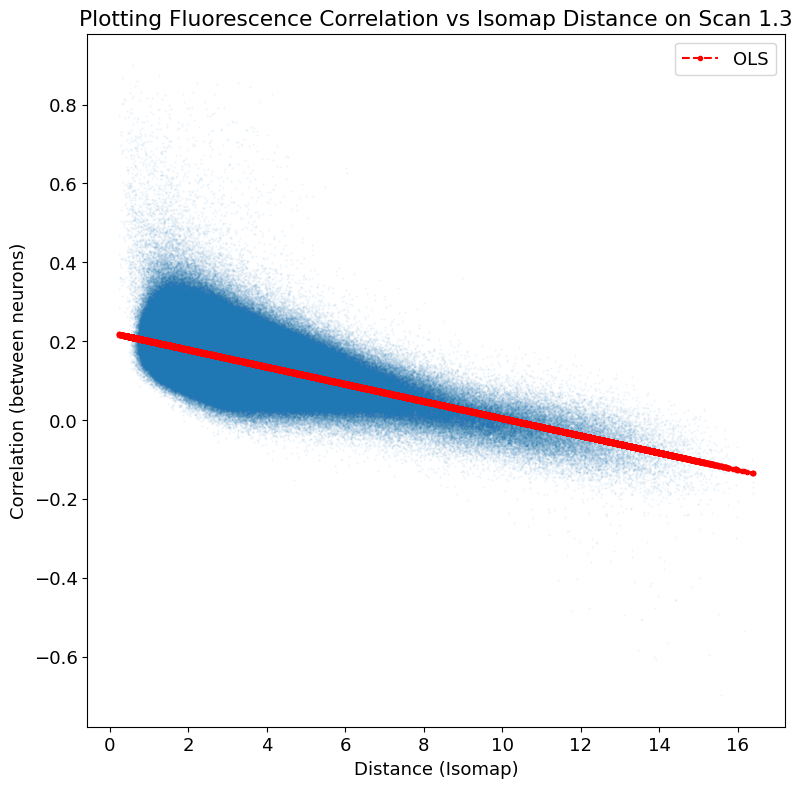

In [ ]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Plotting Fluorescence Correlation vs Isomap Distance on Scan 1.3')
ax.set_xlabel('Distance (Isomap)')
ax.set_ylabel('Correlation (between neurons)')
matplotlib.rcParams['agg.path.chunksize'] = 100000

# Show 2D components plot
step = 1 #plotted_corr_fluorescence_vs_isomap[:,0].shape[0] // 3000000 # sample 3000000 sampled points
sample = np.arange(0, plotted_corr_fluorescence_vs_isomap[:,0].shape[0], step)
curr_sample_X = plotted_corr_fluorescence_vs_isomap[:,0][sample]
curr_sample_Y = plotted_corr_fluorescence_vs_isomap[:,1][sample]
ax.scatter(curr_sample_X, curr_sample_Y , marker='o',alpha=0.05, s = 0.5)

# Fit a linear regression
# Fit a linear regression
X_input = sm.add_constant(plotted_corr_fluorescence_vs_isomap[:,0])
res = sm.OLS(plotted_corr_fluorescence_vs_isomap[:,1], X_input).fit()
ax.plot(plotted_corr_fluorescence_vs_isomap[:,0], res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')
plt.savefig("Corr_vs_Isomap_Tuned.png")
plt.show()

In [ ]:
print(f"AIC of Continuum Model: {res.aic}")
res.summary()

AIC of Continuum Model: -12379820.052446187


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                 1.675e+06
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:04:27   Log-Likelihood:             6.1899e+06
No. Observations:             3665278   AIC:                        -1.238e+07
Df Residuals:                 3665276   BIC:                        -1.238e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2222   5.27e-05   4214.684      0.000       0.222       0.222
x1            -0.0218   1.68e-05  -1294.260      0.000      -0.022      -0.022
==============================================================================
Omnibus:                   536405.501   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2371369.413
Skew:                           0.660   Prob(JB):                         0.00
Kurtosis:                       6.713   Cond. No.                         7.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
###################### Load in Calcium Fluoresence Data ######################
session13_fluorescence = np.load("../../sessionM409828_13_CALCIUM-FLUORESCENCE.npy")
session_info = "V1DD_Session13"

### Create Pandas data frame of the data
ns = [f"n{i}" for i in range(session13_fluorescence[0,:].shape[0])]
session13_fluorescence_df = pd.DataFrame(session13_fluorescence, columns = ns)
session13_fluorescence_df

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2698,n2699,n2700,n2701,n2702,n2703,n2704,n2705,n2706,n2707
0,386.614746,356.042969,364.569641,411.091553,307.887634,258.511169,321.968903,181.205994,265.892914,280.296112,...,274.629486,350.200104,283.980774,345.541870,244.838470,274.587616,292.187408,362.794220,309.516724,318.196716
1,394.779144,321.291138,300.326233,364.549255,365.808014,276.043915,443.065826,276.137421,284.962494,311.085419,...,237.430527,300.656067,371.085419,369.188751,297.386108,266.207123,252.236877,384.805908,253.801224,309.436493
2,430.134644,356.892334,316.089752,369.321747,357.231720,268.536591,380.504395,237.075073,292.391113,303.730865,...,234.579224,233.114975,375.837341,309.508606,319.197876,264.221771,299.052185,421.659119,268.491364,308.236237
3,492.495636,435.140076,328.820099,450.870300,322.758728,283.486267,456.826660,240.693878,298.278900,312.732330,...,312.513519,288.417877,375.175171,298.330444,295.929596,281.991943,291.278473,378.071320,384.879822,342.556366
4,419.968262,367.274200,324.190277,457.118439,391.038940,298.655029,425.800476,229.693817,371.756531,293.526672,...,258.952301,349.974335,346.097595,366.578918,297.467255,328.501526,309.428894,408.260315,347.325104,331.188110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21611,312.012756,361.765015,292.936798,479.136536,364.582458,348.525269,432.958282,265.899567,364.285889,276.832275,...,265.440521,327.389404,314.704071,284.906982,287.028564,280.412109,305.130524,442.109039,266.693573,285.021912
21612,412.542938,353.919128,323.288300,348.898071,383.361847,344.100220,437.041687,193.464905,314.954651,297.092010,...,258.959564,406.966003,341.093964,357.600220,352.963226,278.937195,294.812195,447.871368,294.682220,292.638519
21613,372.910217,388.861816,337.440063,453.535980,350.960876,268.740021,372.935608,239.881393,377.214508,268.052277,...,270.972809,270.036163,298.712524,378.840210,286.396790,301.706818,279.817627,359.911774,317.252136,257.778015
21614,328.085480,415.220123,292.897522,428.899628,355.838837,375.188202,457.023590,239.636383,302.490509,297.914673,...,266.925446,329.060760,306.616821,377.095612,253.035202,261.195953,280.266388,365.129639,325.545532,349.931305


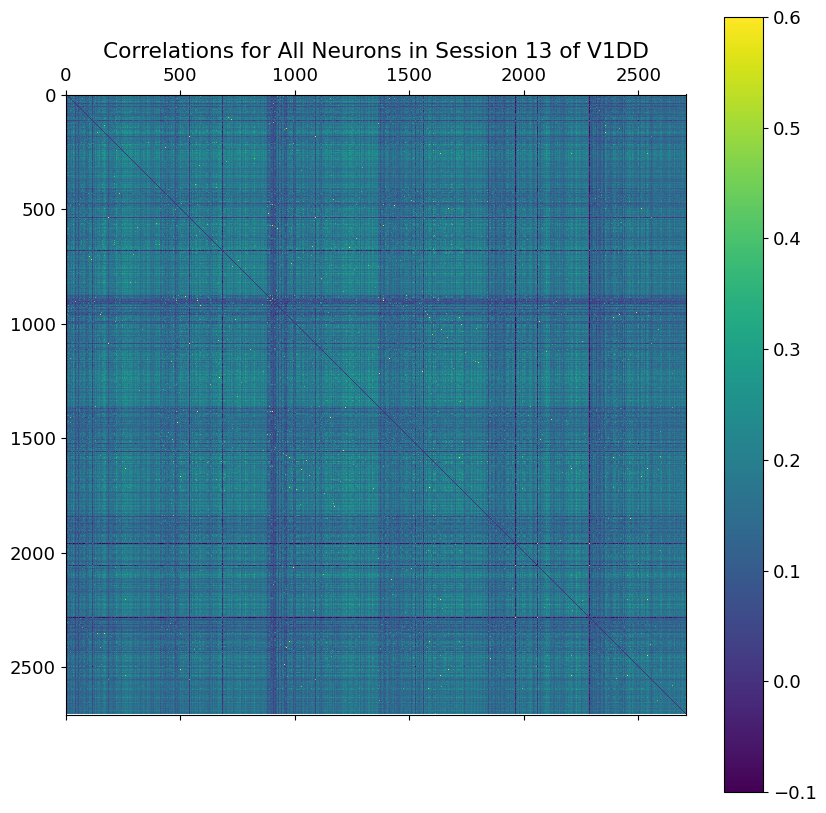

In [ ]:
### Produce the Correlation Matrix
corr_matrix_session13_V1DD = corr_v1DD_scan14_F_df= pd.DataFrame(np.corrcoef(session13_fluorescence_df.values, rowvar=False), columns=session13_fluorescence_df.columns)
np.fill_diagonal(corr_matrix_session13_V1DD.values, 0) # Set All Self Correlations to 0
plt.matshow(corr_matrix_session13_V1DD)
plt.title('Correlations for All Neurons in Session 13 of V1DD')
plt.clim(-0.1, 0.6)
plt.colorbar()
plt.savefig('Correlation_Matrix.png')
plt.show()

### Factor Analysis

We start with a factor analysis to extract the optimal number of components with which to produce the manifold. 

In [ ]:
analyzer = FactorAnalyzer(rotation = None, impute = "drop", n_factors= corr_matrix_session13_V1DD.shape[1])
analyzer.fit(corr_matrix_session13_V1DD)
evals,_ = analyzer.get_eigenvalues()
np.save("EVals_Correlation_Matrix", evals)

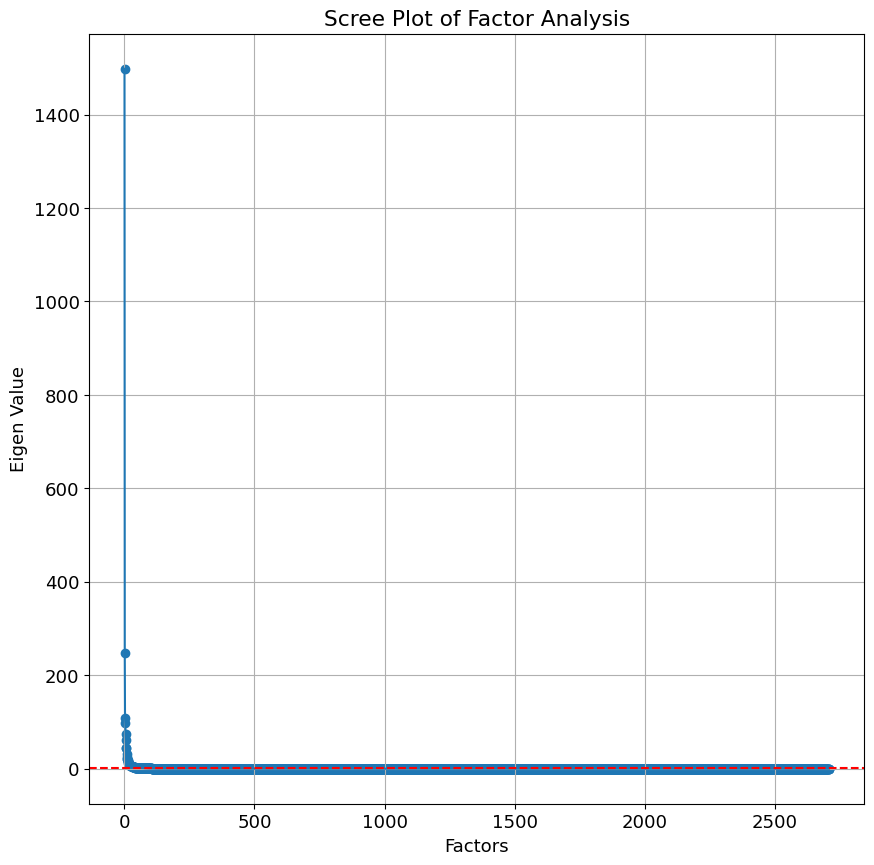

In [ ]:
### Produce a Scree Plot of the Factor Analysis
evals = np.load("EVals_Correlation_Matrix.npy")
plt.scatter(range(1, corr_matrix_session13_V1DD.shape[1]+1), evals)
plt.plot(range(1, corr_matrix_session13_V1DD.shape[1]+1), evals)
plt.axhline(y = 1.0, color = 'r', linestyle = 'dashed')
plt.title('Scree Plot of Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.savefig("Scree_Plot.png")
plt.show()

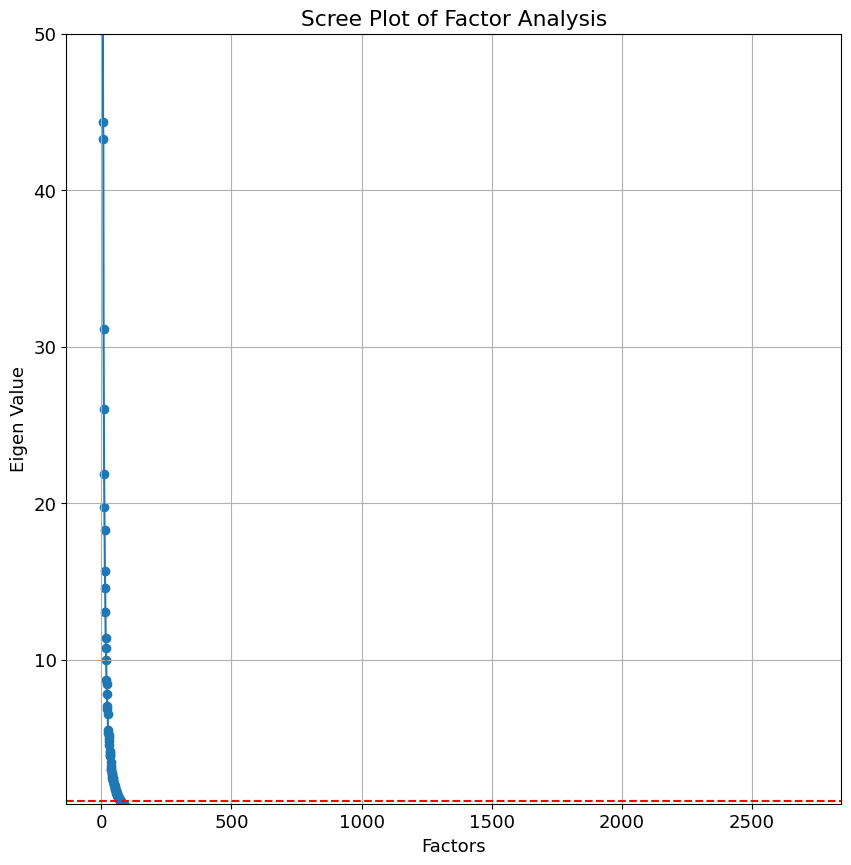

In [ ]:
### Produce a Scree Plot of the Factor Analysis
plt.scatter(range(1, corr_matrix_session13_V1DD.shape[1]+1), evals)
plt.plot(range(1, corr_matrix_session13_V1DD.shape[1]+1), evals)
plt.axhline(y = 1.0, color = 'r', linestyle = 'dashed')
plt.title('Scree Plot of Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.ylim((0.8, 50))
plt.grid()
plt.savefig("Zoomed_Scree_Plot.png")
plt.show()

In [ ]:
idx = np.argwhere(np.diff(np.sign(evals - 2.0))).flatten()
idx

array([49])

The Factor Analysis reveals that there exist 50 components with eigenvalue greater than 2.0, implying these are the optimal dimensions. To confirm, we will output the explained cumulative variance as well.

In [ ]:
optimal_dim = 50

In [ ]:
fa = FactorAnalyzer(rotation = "varimax", impute = "drop", n_factors = optimal_dim)
fa.fit(corr_matrix_session13_V1DD)
# Get variance of each factors
fa.get_factor_variance()[2]

/home/julian/anaconda3/envs/cell_assembly/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:536: UserWarning: Failed to converge: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  warnings.warn('Failed to converge: {}'.format(res.message))


array([0.34566136, 0.5535639 , 0.61225186, 0.6693385 , 0.70638208,
       0.73876791, 0.7665374 , 0.77956924, 0.78939456, 0.79830454,
       0.80686289, 0.81457137, 0.82097087, 0.82710644, 0.83295427,
       0.83782849, 0.84251453, 0.84699917, 0.8513535 , 0.85551103,
       0.85947048, 0.8633963 , 0.86719432, 0.87092233, 0.8745545 ,
       0.87788604, 0.88104053, 0.88406464, 0.88689461, 0.88915499,
       0.89111753, 0.8930659 , 0.89494691, 0.89680864, 0.89861559,
       0.90041728, 0.90219591, 0.90392715, 0.90560374, 0.90721939,
       0.90881934, 0.91033546, 0.91181108, 0.91314893, 0.91446973,
       0.91574931, 0.91699496, 0.91821914, 0.91942919, 0.92051821])

### Isomap Embedding

In [ ]:
### Function to Produce a Manifoldfrom a Disimilarity Matrix
def produce_manifold(curr_diss_matrix, session_info, num_dim):
    iso = manifold.Isomap(n_neighbors=len(curr_diss_matrix) - 1, n_components= num_dim)
    ### Fitting Manifold
    iso.fit(curr_diss_matrix)
    ### Transforming Manifold
    manifold_xD_trans = iso.transform(curr_diss_matrix)
    ### Produce Manifold Left with X dimensions
    col = [f"Component {i}" for i in range(num_dim)]
    manifold_xD = pd.DataFrame(manifold_xD_trans, columns=col)

    ### Save and Return the Manifold
    with open(f'manifold_{num_dim}D_on_corr_{session_info}.pickle', 'wb') as f:
        pickle.dump(manifold_xD, f)
    return manifold_xD

In [ ]:
### Produce the Manifold
diss_matrix = 1 - corr_matrix_session13_V1DD
manifold_xD = produce_manifold(corr_matrix_session13_V1DD, session_info, optimal_dim)

### Plotting of Correlation vs. Isomap Embedding

Producing 2-d Representational Space with which to form our embeddings

In [ ]:
def plot_corr_vs_isomap_distance(manifold, corr_matrix):
    
    # For ease of computation, convert the dataframes to a numpy array
    manifold_array = manifold.values
    corr_matrix_array = corr_matrix.values
    
    # There will be n(n-1) / 2 distinct pairs, where n is the number of units
    n = manifold_array.shape[0]
    new_length = math.floor(n * (n-1) / 2)
    
    # Form an empty array to return
    array_to_plot = np.zeros((new_length,4))
    counter = -1
    
    for i in range(len(manifold_array) - 1):
        for j in range(i+1, len(manifold_array)):
            # increment the counter for the array to plot
            counter += 1
            
            #computing the Euclidan distance
            distance = np.linalg.norm(manifold_array[i,:] - manifold_array[j,:])
            
            array_to_plot[counter,:] = np.array([distance, corr_matrix_array[i,j], i, j])
                     
    return array_to_plot

# with open(f"manifold_{optimal_dim}D_on_corr_{session_info}.pickle", 'rb') as f:
#     manifold_xD = pickle.load(f)

# Produce the Plotting 2-Dim Representaiton
plotted_corr_fluorescence_vs_isomap = plot_corr_vs_isomap_distance(manifold_xD, corr_matrix_session13_V1DD)

print("Saving")
with open(f'plotted_corr_fluorescence_vs_isomap_{session_info}.pickle', 'wb') as f:
    pickle.dump(plotted_corr_fluorescence_vs_isomap, f)

Saving


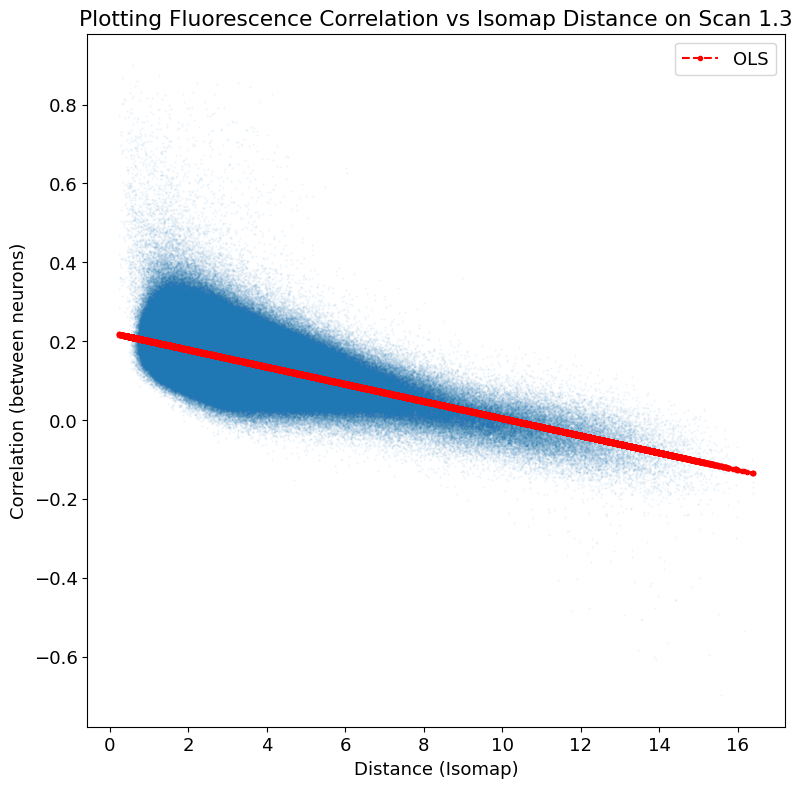

In [ ]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Plotting Fluorescence Correlation vs Isomap Distance on Scan 1.3')
ax.set_xlabel('Distance (Isomap)')
ax.set_ylabel('Correlation (between neurons)')
matplotlib.rcParams['agg.path.chunksize'] = 100000

# Show 2D components plot
step = 1 #plotted_corr_fluorescence_vs_isomap[:,0].shape[0] // 3000000 # sample 3000000 sampled points
sample = np.arange(0, plotted_corr_fluorescence_vs_isomap[:,0].shape[0], step)
curr_sample_X = plotted_corr_fluorescence_vs_isomap[:,0][sample]
curr_sample_Y = plotted_corr_fluorescence_vs_isomap[:,1][sample]
ax.scatter(curr_sample_X, curr_sample_Y , marker='o',alpha=0.05, s = 0.5)

# Fit a linear regression
# Fit a linear regression
X_input = sm.add_constant(plotted_corr_fluorescence_vs_isomap[:,0])
res = sm.OLS(plotted_corr_fluorescence_vs_isomap[:,1], X_input).fit()
ax.plot(plotted_corr_fluorescence_vs_isomap[:,0], res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')
plt.savefig("Corr_vs_Isomap_Tuned.png")
plt.show()

In [ ]:
print(f"AIC of Continuum Model: {res.aic}")
res.summary()

AIC of Continuum Model: -12379820.052446187


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                 1.675e+06
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:04:27   Log-Likelihood:             6.1899e+06
No. Observations:             3665278   AIC:                        -1.238e+07
Df Residuals:                 3665276   BIC:                        -1.238e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2222   5.27e-05   4214.684      0.000       0.222       0.222
x1            -0.0218   1.68e-05  -1294.260      0.000      -0.022      -0.022
==============================================================================
Omnibus:                   536405.501   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2371369.413
Skew:                           0.660   Prob(JB):                         0.00
Kurtosis:                       6.713   Cond. No.                         7.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Session 14 Preperation

In [3]:
###################### Load in Calcium Fluoresence Data ######################
session14_fluorescence = np.load("../Data/Session14/sessionM409828_14_CALCIUM-FLUORESCENCE.npy")
session_info = "V1DD_Session14"

### Create Pandas data frame of the data
ns = [f"n{i}" for i in range(session14_fluorescence[0,:].shape[0])]
session14_fluorescence_df = pd.DataFrame(session14_fluorescence, columns = ns)
session14_fluorescence_df

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2207,n2208,n2209,n2210,n2211,n2212,n2213,n2214,n2215,n2216
0,281.780853,309.074341,279.136169,378.268188,347.440552,271.272888,379.533997,301.510834,337.340851,314.962433,...,290.905090,333.242920,293.056000,237.345917,262.698120,211.532349,330.755096,295.926086,344.021240,276.449005
1,276.678864,323.133545,296.990082,329.151306,282.281738,284.104675,378.802185,243.097031,356.991821,388.305847,...,277.650726,253.782196,233.311737,199.213074,310.164612,245.380859,267.224426,251.768860,267.469055,302.963623
2,281.121918,356.745728,236.408997,392.027466,302.651550,273.520081,348.898987,333.437927,286.702911,355.511597,...,281.371643,253.320862,303.493195,233.474396,289.366547,266.898102,288.432526,304.606750,265.966278,277.706482
3,284.027985,289.542358,254.950424,336.073944,321.936127,280.001556,358.644836,308.430420,360.461578,368.306335,...,243.433914,248.946030,276.677673,221.099396,311.672455,208.512711,300.237488,321.237244,328.836029,270.418243
4,259.401123,305.097076,263.722229,321.373993,282.873688,293.740417,353.374268,335.886749,293.108337,408.797852,...,249.016113,277.719025,314.239716,231.580795,324.517853,258.775238,271.279816,264.577026,269.347107,279.697449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21876,257.532318,245.811417,221.902832,310.464233,266.271820,319.591858,283.485504,284.828766,270.410950,277.912659,...,296.376495,173.791565,283.670044,207.984909,303.890137,224.699753,235.648483,246.781906,263.717987,213.856934
21877,282.082581,304.034149,254.972183,313.695374,330.777405,326.762573,373.822052,342.883820,297.125916,286.763031,...,249.136765,169.879440,300.469971,250.435059,307.856232,231.590576,186.102798,225.050140,211.103653,228.176529
21878,260.028839,305.824615,261.793121,235.514709,303.869781,305.871552,317.410950,271.114319,329.038544,258.160461,...,328.668121,307.382690,255.537689,239.605530,324.962280,218.996887,246.100342,240.685776,317.954315,224.628708
21879,247.948441,240.194290,291.179199,324.519623,249.933167,299.150055,298.165894,261.217468,332.964569,298.866852,...,343.968994,316.531128,306.386292,278.934509,298.435791,233.023849,262.934753,236.624207,271.786346,221.296158


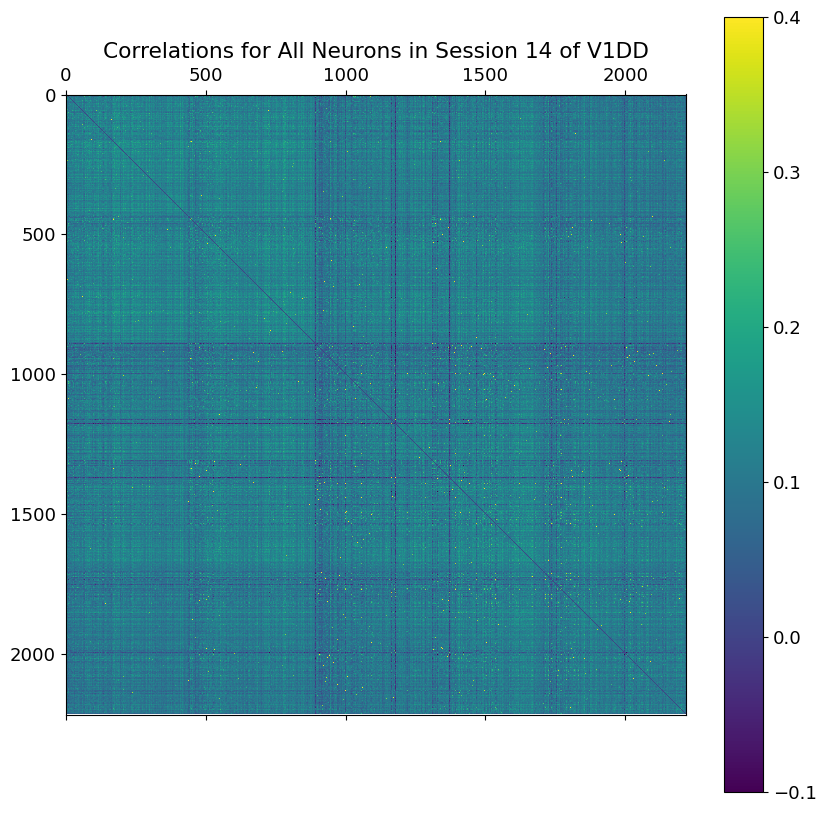

In [5]:
### Produce the Correlation Matrix
corr_matrix_session14_V1DD = pd.DataFrame(np.corrcoef(session14_fluorescence_df.values, rowvar=False), columns=session14_fluorescence_df.columns)
np.fill_diagonal(corr_matrix_session14_V1DD.values, 0) # Set All Self Correlations to 0
plt.matshow(corr_matrix_session14_V1DD)
plt.title('Correlations for All Neurons in Session 14 of V1DD')
plt.clim(-0.1, 0.4)
plt.colorbar()
plt.savefig('Correlation_Matrix_14.png')
plt.show()

### Factor Analysis

We start with a factor analysis to extract the optimal number of components with which to produce the manifold. 

In [6]:
analyzer = FactorAnalyzer(rotation = None, impute = "drop", n_factors= corr_matrix_session14_V1DD.shape[1])
analyzer.fit(corr_matrix_session14_V1DD)
evals,_ = analyzer.get_eigenvalues()
np.save("EVals_Correlation_Matrix_14", evals)

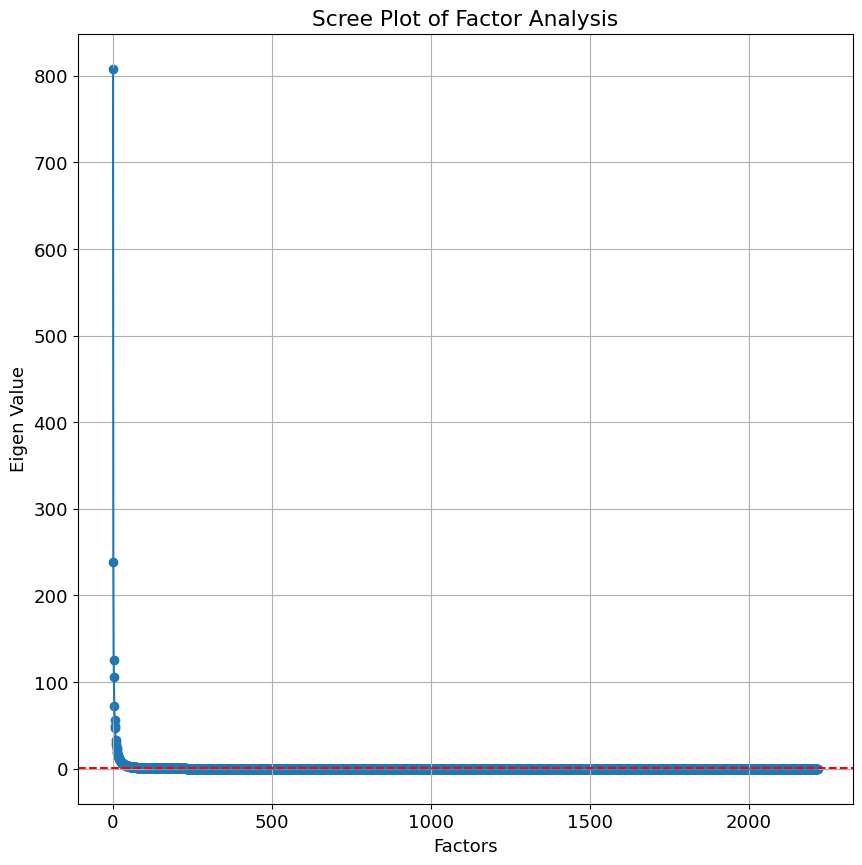

In [8]:
### Produce a Scree Plot of the Factor Analysis
evals = np.load("EVals_Correlation_Matrix_14.npy")
plt.scatter(range(1, corr_matrix_session14_V1DD.shape[1]+1), evals)
plt.plot(range(1, corr_matrix_session14_V1DD.shape[1]+1), evals)
plt.axhline(y = 1.0, color = 'r', linestyle = 'dashed')
plt.title('Scree Plot of Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.savefig("Scree_Plot_14.png")
plt.show()

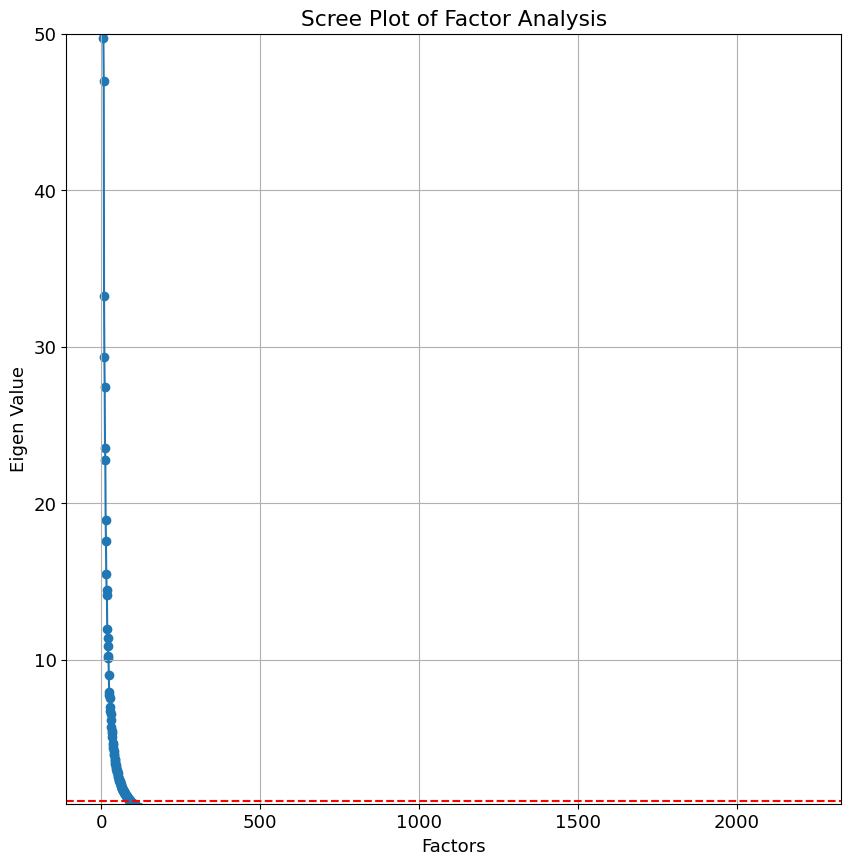

In [9]:
### Produce a Scree Plot of the Factor Analysis
plt.scatter(range(1, corr_matrix_session14_V1DD.shape[1]+1), evals)
plt.plot(range(1, corr_matrix_session14_V1DD.shape[1]+1), evals)
plt.axhline(y = 1.0, color = 'r', linestyle = 'dashed')
plt.title('Scree Plot of Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.ylim((0.8, 50))
plt.grid()
plt.savefig("Zoomed_Scree_Plot_14.png")
plt.show()

In [10]:
idx = np.argwhere(np.diff(np.sign(evals - 2.0))).flatten()
idx

array([60])

The Factor Analysis reveals that there exist 60 components with eigenvalue greater than 2.0, implying these are the optimal dimensions. To confirm, we will output the explained cumulative variance as well.

In [11]:
optimal_dim = 60

In [12]:
fa = FactorAnalyzer(rotation = "varimax", impute = "drop", n_factors = optimal_dim)
fa.fit(corr_matrix_session14_V1DD)
# Get variance of each factors
fa.get_factor_variance()[2]

array([0.22973222, 0.43799072, 0.48571206, 0.53203228, 0.57201413,
       0.6008771 , 0.61866513, 0.63516521, 0.64957575, 0.65881196,
       0.66803421, 0.67660285, 0.68481401, 0.69281287, 0.70062431,
       0.70771821, 0.71412117, 0.72045885, 0.72670161, 0.73272865,
       0.73851801, 0.74425555, 0.7498959 , 0.75552488, 0.76080761,
       0.765831  , 0.77067949, 0.77551526, 0.78014903, 0.7845797 ,
       0.78895996, 0.79306555, 0.79705733, 0.80101998, 0.80470893,
       0.80839775, 0.81203997, 0.81556713, 0.81894352, 0.82220982,
       0.82535897, 0.82848388, 0.83159732, 0.8346485 , 0.83750901,
       0.84009029, 0.84263418, 0.84515831, 0.8475467 , 0.84991828,
       0.85216032, 0.85439244, 0.85656708, 0.85863692, 0.86058911,
       0.86230685, 0.86394011, 0.86552181, 0.86706498, 0.86830433])

### Isomap Embedding

In [13]:
### Function to Produce a Manifoldfrom a Disimilarity Matrix
def produce_manifold(curr_diss_matrix, session_info, num_dim):
    iso = manifold.Isomap(n_neighbors=len(curr_diss_matrix) - 1, n_components= num_dim)
    ### Fitting Manifold
    iso.fit(curr_diss_matrix)
    ### Transforming Manifold
    manifold_xD_trans = iso.transform(curr_diss_matrix)
    ### Produce Manifold Left with X dimensions
    col = [f"Component {i}" for i in range(num_dim)]
    manifold_xD = pd.DataFrame(manifold_xD_trans, columns=col)

    ### Save and Return the Manifold
    with open(f'manifold_{num_dim}D_on_corr_{session_info}.pickle', 'wb') as f:
        pickle.dump(manifold_xD, f)
    return manifold_xD

In [14]:
### Produce the Manifold
diss_matrix = 1 - corr_matrix_session14_V1DD
manifold_xD = produce_manifold(corr_matrix_session14_V1DD, session_info, optimal_dim)

### Plotting of Correlation vs. Isomap Embedding

Producing 2-d Representational Space with which to form our embeddings

In [15]:
def plot_corr_vs_isomap_distance(manifold, corr_matrix):
    
    # For ease of computation, convert the dataframes to a numpy array
    manifold_array = manifold.values
    corr_matrix_array = corr_matrix.values
    
    # There will be n(n-1) / 2 distinct pairs, where n is the number of units
    n = manifold_array.shape[0]
    new_length = math.floor(n * (n-1) / 2)
    
    # Form an empty array to return
    array_to_plot = np.zeros((new_length,4))
    counter = -1
    
    for i in range(len(manifold_array) - 1):
        for j in range(i+1, len(manifold_array)):
            # increment the counter for the array to plot
            counter += 1
            
            #computing the Euclidan distance
            distance = np.linalg.norm(manifold_array[i,:] - manifold_array[j,:])
            
            array_to_plot[counter,:] = np.array([distance, corr_matrix_array[i,j], i, j])
                     
    return array_to_plot

# with open(f"manifold_{optimal_dim}D_on_corr_{session_info}.pickle", 'rb') as f:
#     manifold_xD = pickle.load(f)

# Produce the Plotting 2-Dim Representaiton
plotted_corr_fluorescence_vs_isomap = plot_corr_vs_isomap_distance(manifold_xD, corr_matrix_session14_V1DD)

print("Saving")
with open(f'plotted_corr_fluorescence_vs_isomap_{session_info}.pickle', 'wb') as f:
    pickle.dump(plotted_corr_fluorescence_vs_isomap, f)

Saving


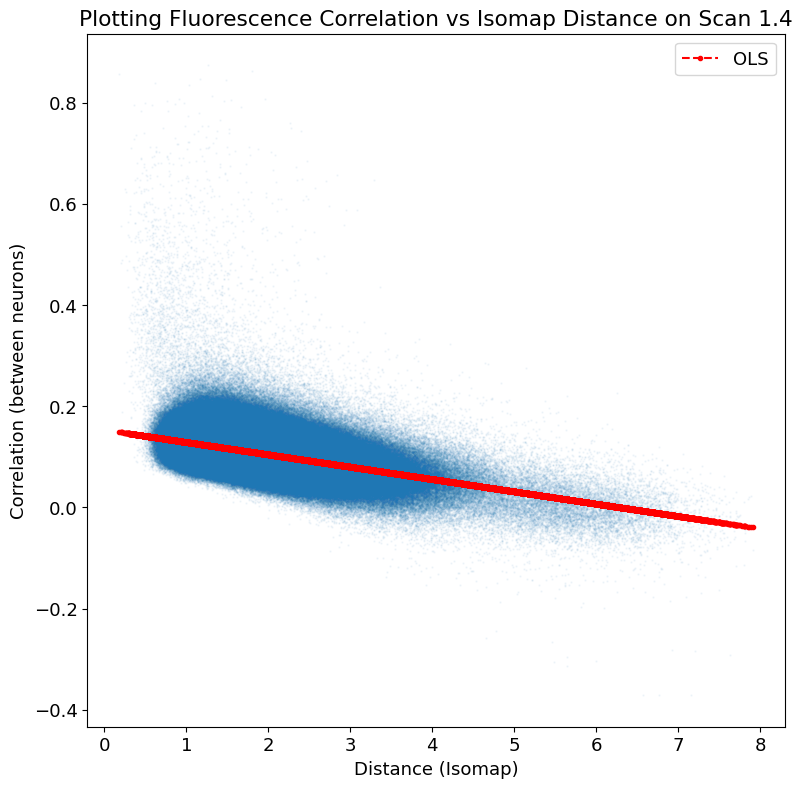

In [16]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Plotting Fluorescence Correlation vs Isomap Distance on Scan 1.4')
ax.set_xlabel('Distance (Isomap)')
ax.set_ylabel('Correlation (between neurons)')
matplotlib.rcParams['agg.path.chunksize'] = 100000

# Show 2D components plot
step = 1 #plotted_corr_fluorescence_vs_isomap[:,0].shape[0] // 3000000 # sample 3000000 sampled points
sample = np.arange(0, plotted_corr_fluorescence_vs_isomap[:,0].shape[0], step)
curr_sample_X = plotted_corr_fluorescence_vs_isomap[:,0][sample]
curr_sample_Y = plotted_corr_fluorescence_vs_isomap[:,1][sample]
ax.scatter(curr_sample_X, curr_sample_Y , marker='o',alpha=0.05, s = 0.5)

# Fit a linear regression
# Fit a linear regression
X_input = sm.add_constant(plotted_corr_fluorescence_vs_isomap[:,0])
res = sm.OLS(plotted_corr_fluorescence_vs_isomap[:,1], X_input).fit()
ax.plot(plotted_corr_fluorescence_vs_isomap[:,0], res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')
plt.savefig("Corr_vs_Isomap_Tuned_14.png")
plt.show()

In [17]:
print(f"AIC of Continuum Model: {res.aic}")
res.summary()

AIC of Continuum Model: -10158763.724176869


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                 6.826e+05
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:26:20   Log-Likelihood:             5.0794e+06
No. Observations:             2456436   AIC:                        -1.016e+07
Df Residuals:                 2456434   BIC:                        -1.016e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1534    5.6e-05   2737.074      0.000       0.153       0.153
x1            -0.0244   2.95e-05   -826.216      0.000      -0.024      -0.024
==============================================================================
Omnibus:                  1159189.781   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         34320440.157
Skew:                           1.680   Prob(JB):                         0.00
Kurtosis:                      21.001   Cond. No.                         6.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""